In [1]:
#Punto 3 Tarea 2 Solar Astrophysics
from astropy.io import fits
import matplotlib.pyplot as plt 
import numpy as np

In [2]:
#Cubo de datos construido.
cube = fits.open("hinode.fits")
cube.info()

Filename: hinode.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     167   (112, 4, 384, 384)   int16   


In [3]:
stokes1=cube[0].data

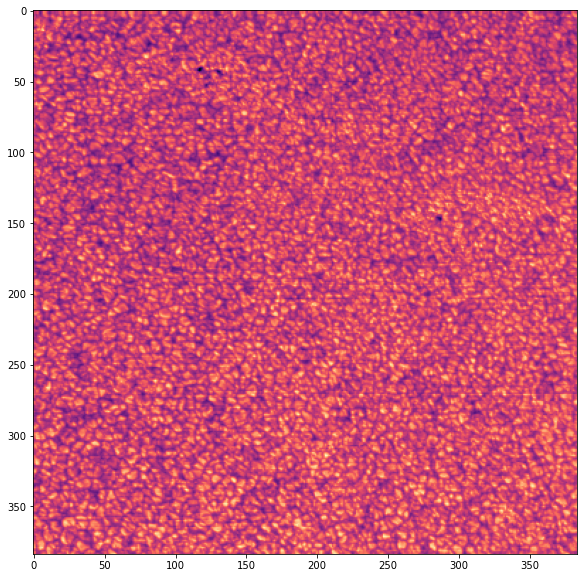

In [4]:
plt.figure(figsize=[10,10])
plt.imshow(stokes1[:,:,0,0],cmap='magma')

In [5]:
cube[0].header

SIMPLE  =                    T /image conforms to FITS standard                 
BITPIX  =                   16 /bits per data value                             
NAXIS   =                    4 / number of axes                                 
NAXIS1  =                  112 /                                                
NAXIS2  =                    4                                                  
NAXIS3  =                  384                                                  
NAXIS4  =                  384                                                  
EXTEND  =                    T /file may contain extensions                     
DATE    = '2019-07-31T16:14:57.000' /                                           
DATE_RF0= '2019-07-31T16:14:57.000' /                                           
TELESCOP= 'HINODE  '           /                                                
INSTRUME= 'SOT/SP  '           /                                                
MDP_CLK =            7487715

In [6]:
spectra=stokes1[:,:,0,:] #Líneas espectrales.

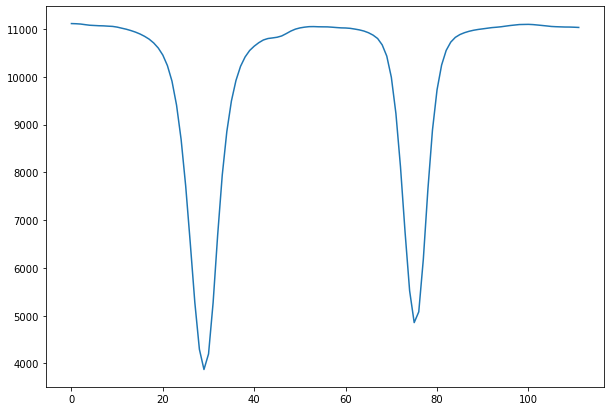

In [7]:
mean = np.mean(spectra,axis=(0,1))
plt.figure(figsize=[10,7])
plt.plot(mean)

In [8]:
from scipy.signal import argrelextrema
mins = argrelextrema(mean, np.less)
print (mins) 

(array([29, 75], dtype=int64),)


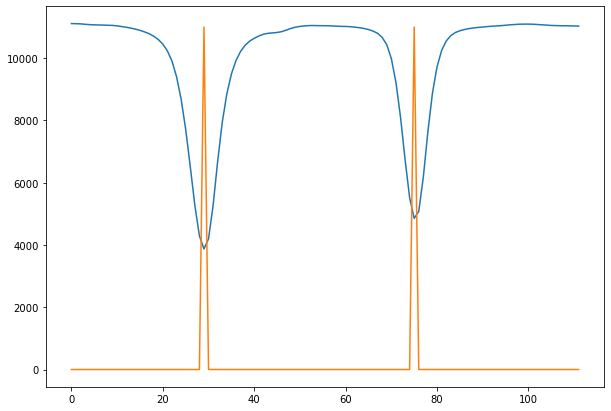

In [9]:
plt.figure(figsize=[10,7])
minima = np.zeros(112)
minima[mins] = 11000.0
plt.plot(mean)
plt.plot(minima)

In [10]:
n1 = 29.0
n2 = 75.0
l1 = 6301.5008 
l2 = 6302.4932
slope = (l2-l1)/(n2-n1)
intercept = l1 - n1*slope
print (slope, intercept)

0.021573913043480192 6300.875156521739


In [11]:
ll = np.linspace(0,111,112)
ll = ll[:] * slope + intercept

In [12]:
atlas = np.loadtxt("atlas_6302.txt",unpack=True)
print (atlas.shape)

(2, 1001)


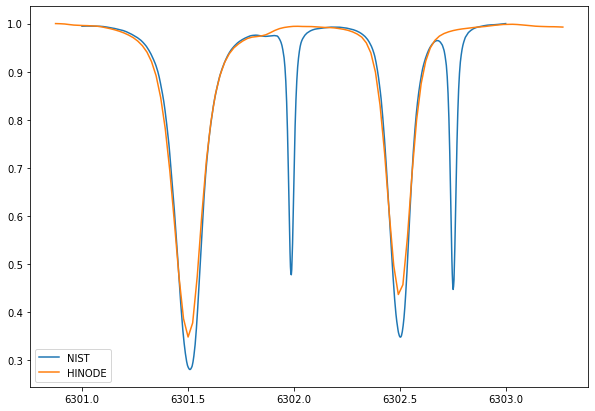

In [13]:
plt.figure(figsize=[10,7])
plt.plot(atlas[0],atlas[1]/np.amax(atlas[1]),label='NIST')
plt.plot(ll,mean/np.amax(mean),label='HINODE')
plt.legend()   #Comparación con espectro del Atlas

In [30]:
#Velocidades
NX = spectra.shape[0]
NY = spectra.shape[1]
v_na = np.zeros([NX,NY])
v_ni = np.zeros([NX,NY])
v_na2 = np.zeros([NX,NY])
v_ni2 = np.zeros([NX,NY])

In [31]:
def calculate_velocity (spectrum,ll,left,right,center_wvl):
    pixel_min = np.argmin(spectrum[left:right])
    v = (ll[pixel_min+left] - center_wvl) / center_wvl * 2.997E5 # in km
    return v
    

In [32]:
for i in range(0,NX):
    for j in range(0,NY):
        v_na[i,j] = calculate_velocity(spectra[i,j],ll,24,34,l1)
        v_ni[i,j] = calculate_velocity(spectra[i,j],ll,70,80,l2)

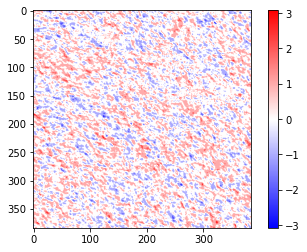

In [39]:
plt.plot(figure=[10,7])
plt.imshow(v_na,cmap='bwr')
plt.colorbar()    

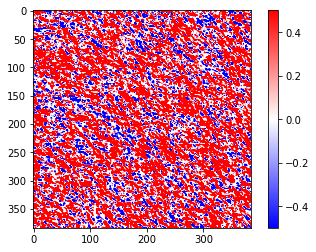

In [34]:
plt.plot(figure=[10,7])
plt.imshow(v_ni,cmap='bwr',vmin=-0.5,vmax=0.5)
plt.colorbar()

In [37]:
def calculate_velocity_pr0 (spectrum,ll,left,right,center_wvl):
    p = np.polyfit(ll[left:right],spectrum[left:right],2)
    ll_min = -p[1]/2./p[0]
    v2 =(ll_min - center_wvl)/center_wvl * 2.997E5
    return v2

In [38]:
for i in range(0,NX):
    for j in range(0,NY):
        v_na2[i,j] = calculate_velocity_pr0(spectra[i,j],ll,26,32,l1)
        v_ni2[i,j] = calculate_velocity_pr0(spectra[i,j],ll,75,85,l2)

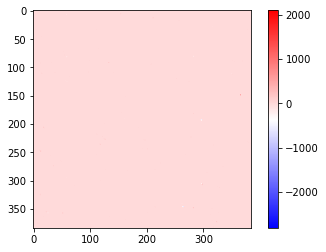

In [40]:
plt.plot(figure=[13,7])
plt.imshow(v_na,cmap='bwr')
plt.colorbar()

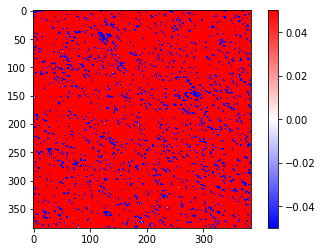

In [41]:
plt.plot(figure=[13,7])
plt.imshow(v_ni2,cmap='bwr',vmin=-0.05,vmax=0.05)
plt.colorbar()